## 1. 주어진 데이터(sampled_data.csv)에 대해 로지스틱 회귀모형(sklearn 패키지 사용 가능)을 적합해보고, Mean Accuracy 찍어보기

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('sampled_data.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,136330,2.108286,-0.020359,-2.234273,-0.124080,0.559843,-1.315913,0.631887,-0.385490,0.150628,...,0.162940,0.519705,-0.091751,-0.379542,0.418822,0.248646,-0.098857,-0.094773,7.70,0
1,116819,2.080143,-0.075408,-1.359381,0.261263,0.232201,-0.797886,0.233487,-0.330165,0.493154,...,-0.317765,-0.784150,0.233078,-0.636937,-0.191137,0.234986,-0.070648,-0.062794,17.99,0
2,27917,1.152650,0.204938,0.441832,1.211595,-0.254895,-0.383380,-0.004286,-0.019590,0.085094,...,0.066674,0.209828,-0.054351,0.058103,0.515330,-0.299402,0.032551,0.022865,21.00,0
3,97443,-0.389692,0.410148,0.616187,-0.686644,1.040312,-0.322199,0.523625,-0.037453,1.319237,...,0.116692,0.685267,-0.182303,0.767857,-0.242738,0.009678,0.115370,0.176041,6.60,0
4,17920,-1.306986,0.183306,3.164803,0.810135,1.529576,2.388322,0.551279,-0.054401,1.675481,...,-0.203993,0.556523,0.146513,-1.128693,-0.633623,-0.454903,-0.826329,-0.826186,4.95,0
5,58224,-0.416532,0.500861,1.833626,0.323728,0.156707,0.521431,0.701146,-0.462224,-0.943502,...,-0.520143,-0.110254,-0.176538,0.002933,-0.256909,-0.332089,-0.058452,-0.410670,9.00,0
6,125791,1.813134,-0.507789,-1.639519,0.151276,0.305866,-0.204291,0.190692,-0.040421,0.523049,...,-0.161309,-0.739418,0.187482,0.157892,-0.188932,-0.634070,-0.049942,-0.038412,123.19,0
7,154999,-0.531838,1.293022,-0.208075,-0.623549,0.123035,-1.051595,0.672289,0.236724,-0.072173,...,-0.244430,-0.566140,0.126251,-0.085134,-0.408364,0.153717,0.238849,0.088812,9.99,0
8,69221,1.143840,0.056991,0.360374,1.417012,-0.302825,-0.215231,-0.029043,0.074978,0.536870,...,-0.114394,-0.195484,-0.051365,0.050694,0.604233,-0.308429,0.027275,0.014314,18.61,0
9,26980,1.258353,0.391069,0.316842,0.688276,-0.329422,-1.062621,0.117182,-0.230082,-0.037929,...,-0.282781,-0.791271,0.124575,0.358075,0.232158,0.092938,-0.019859,0.031669,0.89,0


    Time  : transaction 과 dataset 의 첫번째 트랜잭션 사이에 경과된 시간 
    V1  : 사용자 ID 및 민감한 기능을 보호하기 위해 PCA 치수 감소에 따른 것
    Amount 거래금액
    Class  사기면 1 그렇지 않으면 0

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [5]:
# test 와 train으로 분리하는거
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], random_state = 0)

In [6]:
# 분리한담에 모양보는거 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21360, 30), (7120, 30), (21360,), (7120,))

In [7]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\Users\MiSung\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
y_pred = classifier.predict(X_test) # class 예측
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
classifier.predict_proba(X_test) # The returned estimates for all classes are ordered by the label of classes.

array([[9.99209106e-01, 7.90894246e-04],
       [9.99738708e-01, 2.61292060e-04],
       [9.99998580e-01, 1.42049928e-06],
       ...,
       [9.96341932e-01, 3.65806843e-03],
       [9.99395800e-01, 6.04199595e-04],
       [9.99578107e-01, 4.21893358e-04]])

In [10]:
classifier.score(X_test, y_test) # return mean accuracy

0.998876404494382

정확도 : 예측이 정답과 얼마나 정확한가?

정밀도 : 예측한 것중에 정답의 비율은?

재현율 : 찾아야 할 것중에 실제로 찾은 비율은?

F1 Score : 정밀도와 재현율의 평균

## 2. Confusion Matrix 찍어보기 → Mean Accuracy와 비교

In [11]:
from sklearn.metrics import *

In [12]:
f1_score(y_test, y_pred) # f1 score

0.5

In [13]:
confusion_matrix(y_test, y_pred)

array([[7108,    3],
       [   5,    4]], dtype=int64)

## 3. ROC curve를 그려보자 - Logistic은 cut-off를 어떻게 설정하느냐에 따라 Classification의 성능이 달라짐. 최적의 Cut-off를 ROC 커브를 사용해서 찾아보세요. 또한 새롭게 찾은 cut-off로 예측을 다시 진행하여 성능 평가를 진행하세요

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, classifier.decision_function(X_test))
# 순서대로 fpr, tpr, thresholds를 리턴함!
# fpr = 1-specificity
# tpr = sensitivity
# thresholds = 해당 fpr, tpr을 리턴할 때의 thesholds(cut-off) 값!

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Sensitivity')

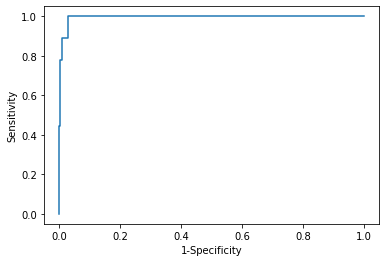

In [16]:
x = fpr
y = tpr

plt.plot(x,y) # 간단하게 ROC 그려볼 수 있음.
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

In [17]:
roc_auc_score(y_test, classifier.decision_function(X_test)) # auc_score 계산

0.9952968015125236